#### **Einleitung:** 

In diesem Projekt wird ein maschinelles Lernmodell entwickelt, um Katzen und Hunde anhand von Bildern zu klassifizieren. Dies ist eine typische Aufgabe im Bereich der Bildverarbeitung und des maschinellen Lernens, die dazu dient, verschiedene Algorithmen und Techniken der künstlichen Intelligenz zu demonstrieren

- **Aufagben:**
    1.  Wie laden und bereiten Sie die Bilddaten für das Training vor?
        Hinweis: Überlegen Sie, wie Sie den Datensatz strukturieren und die Bilder in ein für das Modell geeignetes Format bringen können. Verwenden Sie ImageDataGenerator aus Keras, um die Bilder zu laden und zu normalisieren

    2. Wie wird die Architektur eines Convolutional Neural Network (CNN) für die Bildklassifizierung defeniert?
       Hinweis: Betrachten Sie die verschiedenen Schichten, die in einem CNN verwendet werden, wie Convolutional Layers, Pooling Layers, Flattening und Dense Layers. Beginnen Sie mit der Input-Schicht und bauen Sie das Netzwerk schrittweise auf.


    3. Überlegen Sie sich, welche Aktivierungsfunktionen und Optimierungsmethoden für dieses Modell geeignet sind? z.b [Relu, gelu](theorie.ipynb)
 
       
    4. Wie trainieren Sie das Modell und überwachen dessen Leistung während des Trainings?
      Nutzen Sie die fit-Methode des Modells, um es mit den Trainingsdaten zu trainieren. Verwenden Sie dabei auch Validierungsdaten, um die Leistung des Modells zu überwachen und frühzeitig zu erkennen, ob es über- oder unteranpasst.

    5. Wie evaluieren Sie die Leistung des trainierten Modells auf den Validierungsdaten?
      Hinweis: Nach dem Training können Sie die evaluate-Methode verwenden, um die Leistung des Modells zu testen und die Genauigkeit und den Verlust auf den Validierungsdaten zu messen.



#### **Problemstellung:**

Die Aufgabe besteht darin, ein Modell zu entwickeln, das in der Lage ist, Bilder von Katzen und Hunden zu unterscheiden. Dies erfordert das Sammeln und Vorverarbeiten von Daten, das Erstellen eines geeigneten Modells sowie die Bewertung und Optimierung der Modellleistung.

####  **Lösungssatz:** 

Das Ziel ist es, ein Convolutional Neural Network (CNN) zu implementieren, das auf einem Trainingsdatensatz von Katzen- und Hundebildern trainiert wird. Das Modell soll anschließend in der Lage sein, die Klassifizierung mit hoher Genauigkeit auf einem Testdatensatz durchzuführen.

#### **Aufgabenbearbeitung:**

#### Anforderungen: 


- Ein Datensatz mit Katzen- und Hundebildern (z.B. Kaggle Dogs vs. Cats Dataset).
- Python und Bibliotheken wie TensorFlow oder PyTorch, NumPy, Pandas, Matplotlib.
- Grundkenntnisse in maschinellem Lernen und Deep Learning.

#### Modelbildung: 

- Laden des Datensatzes und Aufteilen in Trainings- und Testdaten.
- Bildvorverarbeitung: Größenanpassung, Normalisierung und Augmentation der Bilder.
- Erstellen eines CNN-Modells mit mehreren Convolutional-, Pooling- und Dense-Schichten.

#### **Algorithmierung/Entwurf:**

1. Datenverabeitung: 
    - Laden der Bilddaten und Konvertierung in ein für das Modell geeignetes Format.
    - Aufteilung der Daten in Trainings- und Validierungssätze.
    - Anwendung von Datenaugmentationstechniken, um die Vielfalt der Trainingsdaten zu erhöhen.

2. Modelarchitektur:
   - Definition der CNN-Architektur mit geeigneten Schichten (Convolutional, Pooling, Fully Connected).
   - Verwendung von Aktivierungsfunktionen wie ReLU und Softmax.
   - Kompilierung des Modells mit einem geeigneten Optimierer (z.B. Adam) und einer Verlustfunktion (z.B. categorical crossentropy).

3. Training und Evaluierung:
   - Training des Modells mit dem Trainingsdatensatz.
   - Überwachung der Modellleistung anhand des Validierungsdatensatzes.
   - Anpassung von Hyperparametern und Modellarchitektur basierend auf den Ergebnissen.

#### **Implementierung:** 


### 1. **Nötige Bibliotheken herunterladen und Setup einrichten**

In [1]:
import tensorflow as tf
import os


In [2]:
#!pip install tensorflow  
#!pip install tensorflow-gpu
#!pip install opencv-python 
#!pip install matplotlib
#!pip install tensorflow_addons



In [3]:
 # Dieser Code verhindert Speicherplatzprobleme bei der GPU-Nutzung
 # Beispiel:
 # Wenn ein Modell 8GB GPU-Speicher benötigt, aber die GPU nur 6GB hat,
 # würde normalerweise ein Fehler auftreten. Mit dieser Einstellung wird
 # der Speicher dynamisch zugewiesen, sodass nur so viel wie nötig verwendet wird.
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

### **2. Datensatz bereinigen** 
**(kleine Bilder entfernen)**

In [4]:


def validate_image(file_path):
    try:
        img = cv2.imread(file_path)
        if img is None:
            return False
        
        # Überprüfe Bildgröße
        height, width, channels = img.shape
        if height < 10 or width < 10:  # Minimale Bildgröße
            return False
            
        # Überprüfe Bildformat
        if imghdr.what(file_path) not in ['jpeg', 'jpg', 'png', 'bmp']:
            return False
            
        return True
    except Exception:
        return False

# Bereinige den Datensatz
data_dir = 'PetImages'
categories = ['Cat', 'Dog']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        if not validate_image(img_path):
            print(f'Removing corrupted image: {img_path}')
            os.remove(img_path)

### **3. Bilder hochladen**

In [5]:


try:
    data = tf.keras.utils.image_dataset_from_directory(
        'C:/Users/yahya/TUclaushtal/data4',  # Use absolute path
        # validation_split=0.2,
        # subset="training", 
        # seed=123,
        # image_size=(256, 256),
        # batch_size=32,
        # shuffle=True,
        # color_mode='rgb',
        # interpolation='bilinear',
        # follow_links=False
    )
    
    # # Füge Fehlerbehandlung für die Datentransformation hinzu
    # data = data.map(lambda x, y: (x/255.0, y),
    #                 num_parallel_calls=tf.data.AUTOTUNE,
    #                 deterministic=False).prefetch(tf.data.AUTOTUNE)

except Exception as e:
    print(f"Fehler beim Laden des Datasets: {str(e)}")
    raise

Found 500 files belonging to 2 classes.


In [6]:
# Importiere numpy für numerische Berechnungen und matplotlib für Visualisierungen
import numpy as np
from matplotlib import pyplot as plt



# Erstelle einen Iterator über das Dataset, der es ermöglicht,
# die Bilder und Labels batch-weise zu durchlaufen
data_iterator = data.as_numpy_iterator()
# Die auskommentierte Zeile würde den nächsten Batch aus dem Dataset holen
#batch = data_iterator.next()


### 4. **Daten(Bilder) skalieren** 

In [7]:
# Diese Zeile skaliert die Pixelwerte der Bilder von 0-255 auf 0-1
# Beispiel:
# Ein Pixel mit dem Wert 255 (weiß) wird zu 255/255 = 1.0
# Ein Pixel mit dem Wert 127 wird zu 127/255 = ~0.5 
# Ein Pixel mit dem Wert 0 (schwarz) wird zu 0/255 = 0.0
#
# x enthält die Bilder mit Pixelwerten von 0-255
# y enthält die Labels (0 für Katze, 1 für Hund)
# Die map Funktion wendet diese Skalierung auf alle Bilder im Dataset an
# Lambda ist eine anonyme Funktion, die zwei Parameter x und y akzeptiert
# x enthält die Bilddaten (Pixelwerte von 0-255)
# y enthält die Labels (0 für Katze, 1 für Hund)
# Die Funktion teilt jeden Pixelwert durch 255 um die Werte auf 0-1 zu skalieren
# y bleibt unverändert
# map wendet diese Lambda-Funktion auf jeden Datensatz im Dataset an
data = data.map(lambda x,y: (x/255, y))


In [8]:
# Diese Zeile erstellt einen Iterator über unseren skalierten Bilddatensatz
# Der scaled_iterator ermöglicht uns den Zugriff auf Batches von vorverarbeiteten Bildern und deren Labels
#
# Zum Beispiel:
# Wenn wir 100 Bilder von Katzen und Hunden haben, die auf Werte zwischen 0-1 skaliert wurden:
# scaled_iterator.next() würde einen Batch zurückgeben, der enthält:
#   - Ein numpy Array von 32 Bildern (Standard Batch-Größe) mit Pixelwerten zwischen 0-1
#   - Die zugehörigen Labels (0 für Katze, 1 für Hund)
#
# Wenn wir also:
# batch = scaled_iterator.next() ausführen
# batch[0] gibt uns die 32 Bilder
# batch[1] gibt uns die 32 Labels
scaled_iterator = data.as_numpy_iterator()


In [9]:
# Diese Zeile holt den nächsten Batch skalierter Bilder und deren Labels aus dem Dataset-Iterator
# scaled_iterator enthält die vorverarbeiteten Bilder (skaliert zwischen 0-1) und ihre zugehörigen Labels (0 für Katze, 1 für Hund)
# .next() ruft den nächsten Batch von 32 Bildern und Labels ab
# Die batch Variable enthält ein Tupel bestehend aus:
#   - batch[0]: Ein numpy Array der Form (32, Höhe, Breite, 3) mit 32 skalierten Bildern
#   - batch[1]: Ein numpy Array der Form (32,) mit den zugehörigen Labels
batch = scaled_iterator.next()

In [10]:
batch[0][0]

array([[[0.69852173, 0.8240119 , 0.8828355 ],
        [0.704856  , 0.8303462 , 0.88916975],
        [0.7122166 , 0.8377068 , 0.89653033],
        ...,
        [0.2636489 , 0.30678615, 0.24404106],
        [0.25634956, 0.29948682, 0.23674172],
        [0.25146294, 0.2946002 , 0.23185508]],

       [[0.69852173, 0.8240119 , 0.8828355 ],
        [0.704856  , 0.8303462 , 0.88916975],
        [0.7122166 , 0.8377068 , 0.89653033],
        ...,
        [0.27622646, 0.31526142, 0.25388375],
        [0.27543107, 0.31463265, 0.25319943],
        [0.28169903, 0.3154864 , 0.25585794]],

       [[0.69852173, 0.8240119 , 0.8828355 ],
        [0.704856  , 0.8303462 , 0.88916975],
        [0.7122166 , 0.8377068 , 0.89653033],
        ...,
        [0.29610738, 0.32937348, 0.26482844],
        [0.30021134, 0.33360955, 0.26900324],
        [0.3083958 , 0.3375    , 0.27488512]],

       ...,

       [[0.6209116 , 0.6091469 , 0.40022907],
        [0.65768445, 0.6444721 , 0.44386706],
        [0.5755575 , 0

In [11]:
# This line checks the maximum and minimum pixel values in the first batch of scaled images
# batch[0] contains the image data (32 images) after scaling/normalization
# .max() finds the highest pixel value across all images in the batch (should be 1.0 since we scaled by dividing by 255)
# .min() finds the lowest pixel value across all images in the batch (should be 0.0)
# Returns a tuple of (max_value, min_value) to verify our scaling worked correctly
batch[0].max(), batch[0].min()

(1.0, 0.0)

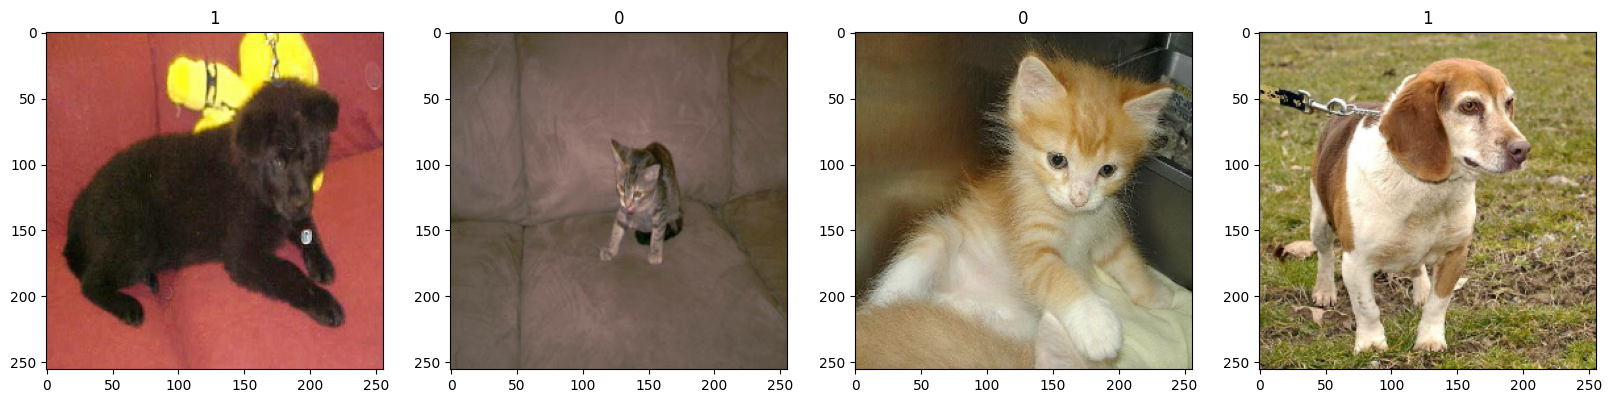

In [52]:

# Creates a figure with 4 subplots arranged horizontally (ncols=4) with a total figure size of 20x20 inches
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, bild in enumerate(batch[0][:4]):
    ax[idx].imshow(bild)
    ax[idx].title.set_text(batch[1][idx])
    
# 0 = Katze 
# 1 = Hund

### 5.**Daten Aufteilen in :  Train-, Validation- und Test-splits:** 

In [13]:
# size in Batches angegeben. Ein Batch entählt 32
train_size = int(len(data)*.7) # 70% des Datensatzes für Training
val_size = int(len(data)*.2) # 20% des Datensatzes für Validation
test_size = int(len(data)*.1) #10% des Datensatzes für Testing
#print(train_size,val_size,test_size)

train = data.take(train_size) # nimmt "Train-size" für Training also 70% der bilder
val = data.skip(train_size).take(val_size)# val skippt die 70% von train und nimmt dann 20 der restlichen Bilder für Validation
test = data.skip(train_size+val_size).take(test_size) # test skippt train und val und nimmt die restlichen 10% für Testing


### 6. **Deep Learning Model bauen:** 

In [17]:
#train
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential() # Name des Modells ist "model"
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))

#model.add(MaxPooling2D())
#model.add(Conv2D(64, (3,3), 1, activation='relu'))
#model.add(MaxPooling2D())
#model.add(Conv2D(64, (3,3), 1, activation='relu'))
#model.add(MaxPooling2D())
model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))#
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])



model.summary()


c:\Users\yahya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2064512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │     2,064,513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,065,409 (7.88 MB)

 Trainable params: 2,065,409 (7.88 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:

# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     validation_split=0.2  # Add validation split
# )

# # Assuming you have a directory structure for training images
# train_data_dir = 'Pythonlernmedien/Problembeispielen/data3'

# # Create generators
# train_generator = datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary',
#     subset='training'  # Set as training data
# )

# validation_generator = datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary',
#     subset='validation'  # Set as validation data
# )
# batch[1].max(), batch[1].min()

### 7. **Deep Learning Model trainineren (model.fit):** 

In [18]:
logdir='Pythonlernmedien/Problembeispielen/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # um zwischenzeitliche Fortschritte des Modells während des Trainings zu speicherm
# Nützlich zum plotten der Daten . 
model_Verlauf = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback]) 


Epoch 1/10


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.4111 - loss: 49.4047 - val_accuracy: 0.5521 - val_loss: 23.5122
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.5293 - loss: 21.4915 - val_accuracy: 0.4896 - val_loss: 9.4203
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.5009 - loss: 5.9183 - val_accuracy: 0.5938 - val_loss: 0.6966
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.6796 - loss: 0.6206 - val_accuracy: 0.6771 - val_loss: 0.5600
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.7682 - loss: 0.4920 - val_accuracy: 0.9062 - val_loss: 0.4237
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9022 - loss: 0.3929 - val_accuracy: 0.9167 - val_loss: 0.3224
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.9570 - loss: 0.2730 - val_accuracy: 0.9167 - val_loss: 0.2682
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9584 - loss: 0.1837 - val_accuracy: 0.9271 - v

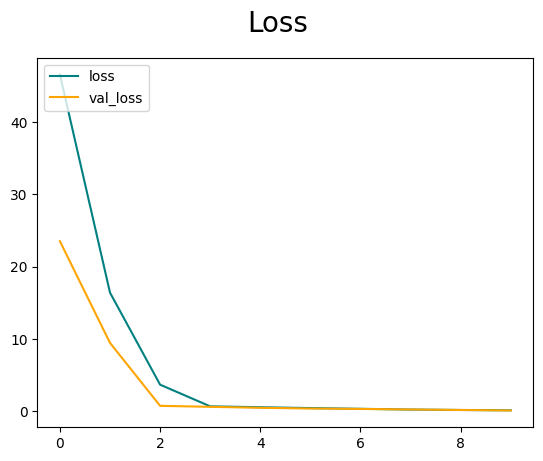

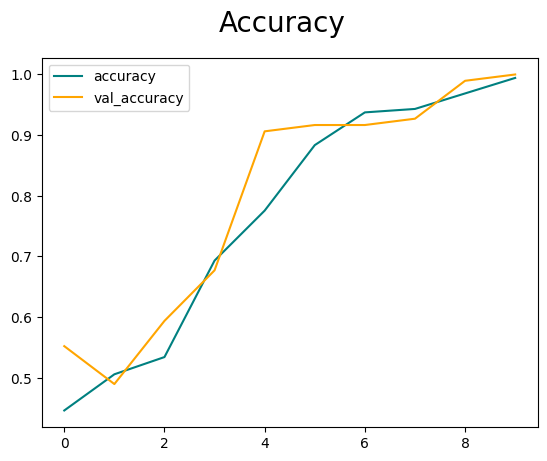

In [19]:
### 7. ** Performance des Modells plotten**

# Visualisierung der Modellleistung über die Trainingsepochen

# Erste Abbildung: Verlustfunktion (Loss)
# Zeigt wie gut das Modell während des Trainings und der Validierung konvergiert
fig = plt.figure()
plt.plot(model_Verlauf.history['loss'], color='teal', label='loss')  # Trainingsverlust
plt.plot(model_Verlauf.history['val_loss'], color='orange', label='val_loss')  # Validierungsverlust
fig.suptitle('Loss', fontsize=20)  # Titel der Abbildung
plt.legend(loc="upper left")  # Legende oben links positionieren
plt.show()

# Zweite Abbildung: Genauigkeit (Accuracy) 
# Zeigt den Anteil der korrekten Vorhersagen während Training und Validierung
fig = plt.figure()
plt.plot(model_Verlauf.history['accuracy'], color='teal', label='accuracy')  # Trainingsgenauigkeit
plt.plot(model_Verlauf.history['val_accuracy'], color='orange', label='val_accuracy')  # Validierungsgenauigkeit
fig.suptitle('Accuracy', fontsize=20)  # Titel der Abbildung
plt.legend(loc="upper left")  # Legende oben links positionieren
plt.show()


### 8. ** Evaluation des Modells : **

In [20]:
# Importieren der Metriken aus Keras für die Modellbewertung
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Initialisierung der Metriken
pre = Precision()    # Präzision: Anteil der korrekten positiven Vorhersagen an allen positiven Vorhersagen
re = Recall()        # Recall: Anteil der korrekt erkannten positiven Fälle an allen tatsächlich positiven Fällen
acc = BinaryAccuracy()  # Genauigkeit: Anteil aller korrekten Vorhersagen (positiv und negativ)

# Durchlaufen des Testdatensatzes in Batches
for batch in test.as_numpy_iterator(): 
    X, y = batch    # X enthält die Bilder, y die wahren Labels
    ydach = model.predict(X)    # Vorhersagen des Modells für den aktuellen Batch
    
    # Aktualisierung der Metrik-Werte mit den wahren Labels (y) und Vorhersagen (ydach)
    pre.update_state(y, ydach)
    re.update_state(y, ydach)
    acc.update_state(y, ydach)
    
# Ausgabe der finalen Metrik-Werte
print(f'{pre.result()}, {re.result()}, {acc.result()}')

#print ("->", batch,, batch.min())

#print (batch[0].min(), batch[0].max())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1.0, 1.0, 1.0


### 9. Testing mit anderen Bildren : 


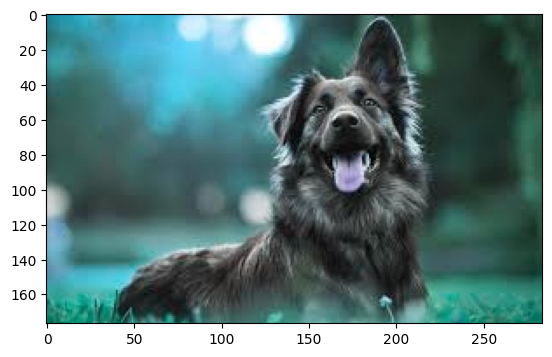

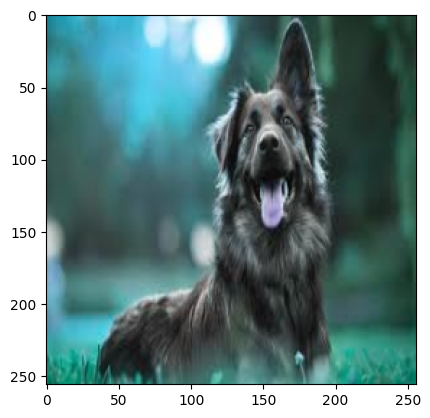

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
im Bild ist ein Hund zu sehen


array([[0.7242246]], dtype=float32)

In [54]:
# OpenCV für Bildverarbeitung importieren
import cv2

# Name des zu testenden Bildes
testName = "hund2.jpg"  
# Bild von lokalem Pfad einlesen
bild_Web = cv2.imread(f'C:/Users/yahya/TUclaushtal/testphotos/{testName}')
# Originalbild anzeigen
plt.imshow(bild_Web)
plt.show()

# Bild auf die erforderliche Größe von 256x256 Pixel skalieren
resizezbild = tf.image.resize(bild_Web, (256,256))
# Skaliertes Bild anzeigen
plt.imshow(resizezbild.numpy().astype(int))
plt.show()

# Bild für die Vorhersage vorbereiten und durch das Modell laufen lassen
# Pixelwerte auf Bereich 0-1 normalisieren und Dimension für Batch hinzufügen
ydach = model.predict(np.expand_dims(resizezbild/255, 0))
# Vorhersage interpretieren: Werte > 0.4 bedeuten Hund, sonst Katze
if ydach[0][0] > 0.4:
    print('im Bild ist ein Hund zu sehen')
else:
    print('im Bild ist eine Katze zu sehen')

# Rohen Vorhersagewert ausgeben
ydach

In [37]:
'''
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.models import load_model
save_model(model, 'my_model.keras')
new_model = load_model('my_model.keras')
#array([[0.90297127]], dtype=float32)
#rray([[0.9999443]], dtype=float32)
'''

"\nfrom tensorflow.keras.models import save_model, load_model\nfrom tensorflow.keras.models import load_model\nsave_model(model, 'my_model.keras')\nnew_model = load_model('my_model.keras')\n#array([[0.90297127]], dtype=float32)\n#rray([[0.9999443]], dtype=float32)\n"


```markdown
# Funktionsbeschreibungen : 

## Verwendete Befehle und Funktionen

### print
Ausgabetext auf der Konsole anzeigen.

**Schreibweise und Beispiel:**
```python
print("Hallo, Welt!")
# Ausgabe: Hallo, Welt!
```

### map
Eine Funktion auf jedes Element einer Liste anwenden.

**Schreibweise und Beispiel:**
```python
def quadrat(x):
    return x * x

zahlen = [1, 2, 3, 4]
ergebnis = list(map(quadrat, zahlen))
print(ergebnis)
# Ausgabe: [1, 4, 9, 16]
```

### len
Die Länge eines Objekts (z.B. Liste) zurückgeben.

**Schreibweise und Beispiel:**
```python
liste = [1, 2, 3, 4]
print(len(liste))
# Ausgabe: 4
```

### add
Eine Operation, die zwei Werte addiert.

**Schreibweise und Beispiel:**
```python
import numpy as np

a = np.array([1, 2])
b = np.array([3, 4])
ergebnis = np.add(a, b)
print(ergebnis)
# Ausgabe: [4, 6]
```

### int
Eine Zahl in einen Ganzzahlwert umwandeln.

**Schreibweise und Beispiel:**
```python
zahl = 3.14
ganzzahl = int(zahl)
print(ganzzahl)
# Ausgabe: 3
```

### min
Den kleinsten Wert in einer Liste oder einem Array finden.

**Schreibweise und Beispiel:**
```python
zahlen = [1, 2, 3, 4]
print(min(zahlen))
# Ausgabe: 1
```

### max
Den größten Wert in einer Liste oder einem Array finden.

**Schreibweise und Beispiel:**
```python
zahlen = [1, 2, 3, 4]
print(max(zahlen))
# Ausgabe: 4
```

### numpy
Eine Bibliothek für wissenschaftliches Rechnen mit Python, die Unterstützung für große, mehrdimensionale Arrays und Matrizen bietet.

### array
Eine Funktion aus der numpy-Bibliothek, um ein Array zu erstellen.

**Schreibweise und Beispiel:**
```python
import numpy as np

array = np.array([1, 2, 3, 4])
print(array)
# Ausgabe: [1 2 3 4]
```

### astype
Eine Methode, um den Datentyp eines Arrays zu ändern.

**Schreibweise und Beispiel:**
```python
import numpy as np

array = np.array([1, 2, 3, 4], dtype=float)
print(array)
# Ausgabe: [1. 2. 3. 4.]
```

### imshow
Eine Funktion aus der Matplotlib-Bibliothek, um ein Bild anzuzeigen.

**Schreibweise und Beispiel:**
```python
import matplotlib.pyplot as plt
import numpy as np

bild = np.random.rand(100, 100)
plt.imshow(bild, cmap='gray')
plt.show()
```

### resize
Eine Methode, um die Größe eines Bildes oder Arrays zu ändern.

**Schreibweise und Beispiel:**
```python
import numpy as np

array = np.array([1, 2, 3, 4, 5, 6])
neues_array = np.resize(array, (2, 3))
print(neues_array)
# Ausgabe: [[1 2 3]
#           [4 5 6]]
```

### join
Eine Methode, um eine Liste von Strings zu einem einzelnen String zu verbinden.

**Schreibweise und Beispiel:**
```python
liste = ['Hallo', 'Welt']
verbunden = ' '.join(liste)
print(verbunden)
# Ausgabe: Hallo Welt
```

### format
Eine Methode, um einen String zu formatieren.

**Schreibweise und Beispiel:**
```python
name = "Welt"
ausgabe = "Hallo, {}!".format(name)
print(ausgabe)
# Ausgabe: Hallo, Welt!
```

### enumerate
Eine Funktion, die eine aufzählbare Liste von Tuple (Index, Wert) zurückgibt.

**Schreibweise und Beispiel:**
```python
liste = ['a', 'b', 'c']
for index, wert in enumerate(liste):
    print(index, wert)
# Ausgabe:
# 0 a
# 1 b
# 2 c
```

### next
Eine Funktion, um das nächste Element eines Iterators zurückzugeben.

**Schreibweise und Beispiel:**
```python
iterator = iter([1, 2, 3])
print(next(iterator))
# Ausgabe: 1
```

### listdir
Listet die Dateien in einem Verzeichnis auf.

**Schreibweise und Beispiel:**
```python
import os

dateien = os.listdir('.')
print(dateien)
```

### remove
Eine Funktion, um eine Datei zu löschen.

**Schreibweise und Beispiel:**
```python
import os

os.remove('datei.txt')
```

### Conv2D
Eine Schicht für ein Convolutional Neural Network (CNN) in Keras.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Conv2D

conv = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')
```

### MaxPooling2D
Eine Schicht für die Max-Pooling-Operation in einem CNN.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import MaxPooling2D

pooling = MaxPooling2D(pool_size=(2, 2))
```

### Flatten
Eine Schicht, um mehrdimensionale Eingaben zu einer eindimensionalen Ausgabe abzuflachen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Flatten

flatten = Flatten()
```

### Dense
Eine vollständig verbundene Schicht in einem neuronalen Netzwerk.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Dense

dense = Dense(units=128, activation='relu')
```

### Dropout
Eine Schicht, die Dropout-Regularisierung in einem neuronalen Netzwerk durchführt.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Dropout

dropout = Dropout(rate=0.5)
```

### Sequential
Ein sequentielles Modell in Keras, bei dem die Schichten linear aufeinander folgen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.models import Sequential

modell = Sequential()
```

### compile
Eine Methode, um das Keras-Modell zu kompilieren.

**Schreibweise und Beispiel:**
```python
modell.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

### fit
Eine Methode, um das Keras-Modell zu trainieren.

**Schreibweise und Beispiel:**
```python
modell.fit(x_train, y_train, epochs=10)
```

### predict
Eine Methode, um Vorhersagen mit dem trainierten Keras-Modell zu machen.

**Schreibweise und Beispiel:**
```python
vorhersagen = modell.predict(x_test)
```

### save_model
Eine Methode, um das trainierte Modell zu speichern.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.models import save_model

save_model(modell, 'modell.h5')
```

### load_model
Eine Methode, um ein gespeichertes Modell zu laden.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.models import load_model

modell = load_model('modell.h5')
```

### BinaryCrossentropy
Ein Verlustfunktion für binäre Klassifizierungsprobleme.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.losses import BinaryCrossentropy

verlust = BinaryCrossentropy()
```

### BinaryAccuracy
Eine Metrik, um die Genauigkeit bei binären Klassifizierungsproblemen zu messen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.metrics import BinaryAccuracy

genauigkeit = BinaryAccuracy()
```

### Precision
Eine Metrik, um die Präzision bei Klassifizierungsproblemen zu messen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.metrics import Precision

präzision = Precision()
```

### Recall
Eine Metrik, um den Rückruf bei Klassifizierungsproblemen zu messen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.metrics import Recall

rückruf = Recall()
```

### ImageDataGenerator
Eine Klasse, um Bilder für das Training von Keras-Modellen zu generieren.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datengenerator = ImageDataGenerator(rescale=1./255)
```

### flow_from_directory
Eine Methode, um Bilder aus einem Verzeichnis zu laden und für das Training vorzubereiten.

**Schreibweise und Beispiel:**
```python
train_data = datengenerator.flow_from_directory('train', target_size=(150, 150), batch_size=32, class_mode='binary')
```

### image_dataset_from_directory
Eine Methode, um ein Bilddatensatz aus einem Verzeichnis zu erstellen.

**Schreibweise und Beispiel:**
```python
import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory('verzeichnis')
```

### TensorBoard
Ein Werkzeug zur Visualisierung von TensorFlow-Grafiken und anderen Metriken.

### subplots
Eine Funktion aus Matplotlib,

In [7]:
import os

# Pfad überprüfen
base_dir = 'C:/Users/yahya/TUclaushtal/PetImages'

# Überprüfe ob das Hauptverzeichnis existiert
print(f"Hauptverzeichnis existiert: {os.path.exists(base_dir)}")

# Überprüfe die Unterverzeichnisse
cat_dir = os.path.join(base_dir, 'Cat')
dog_dir = os.path.join(base_dir, 'Dog')

print(f"Katzen-Verzeichnis existiert: {os.path.exists(cat_dir)}")
print(f"Hunde-Verzeichnis existiert: {os.path.exists(dog_dir)}")

# Zähle die Bilder in jedem Verzeichnis
if os.path.exists(cat_dir):
    cat_images = len(os.listdir(cat_dir))
    print(f"Anzahl der Katzenbilder: {cat_images}")

if os.path.exists(dog_dir):
    dog_images = len(os.listdir(dog_dir))
    print(f"Anzahl der Hundebilder: {dog_images}")

# Zeige die ersten paar Dateien in jedem Verzeichnis
print("\nErste 5 Dateien im Katzen-Verzeichnis:")
if os.path.exists(cat_dir):
    print(os.listdir(cat_dir)[:5])

print("\nErste 5 Dateien im Hunde-Verzeichnis:")
if os.path.exists(dog_dir):
    print(os.listdir(dog_dir)[:5])

Hauptverzeichnis existiert: True
Katzen-Verzeichnis existiert: True
Hunde-Verzeichnis existiert: True
Anzahl der Katzenbilder: 0
Anzahl der Hundebilder: 0

Erste 5 Dateien im Katzen-Verzeichnis:
[]

Erste 5 Dateien im Hunde-Verzeichnis:
[]
